In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates
from cycler import cycler
from collections import OrderedDict
import matplotlib.mlab as ml

%matplotlib notebook

In [2]:
# Load HDF file
folder = '1470915710.339415'
data_folder = '../Data/'  # 'Z:/LabOnChip/Data/'
df = pd.HDFStore(data_folder + str(folder) +'/analysis.h5')['df']

# Create column for time since start of measurement
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

In [3]:
df.head()
# df.info()

,datetime,chip,concentration,current,fs,humidity,measurementID,medium,optical power,sample_no,sweep_no,sweeps,tempC,A,tau,c,delta
0,2016-08-11 12:42:24.253033,T26,99,0.5,0.0001,45.94,1470915710.339415,Reflectance Standards,0.251024,1000,1,500,24.8,0.771561,9.590717,-0.001957,0.000000
1,2016-08-11 12:42:24.551063,T26,99,0.5,0.0001,45.94,1470915710.339415,Reflectance Standards,0.251024,1000,2,500,24.8,0.771316,9.588580,-0.002247,0.004967
2,2016-08-11 12:42:24.848093,T26,99,0.5,0.0001,45.94,1470915710.339415,Reflectance Standards,0.251024,1000,3,500,24.8,0.769175,9.588240,-0.002070,0.009918
3,2016-08-11 12:42:25.052113,T26,99,0.5,0.0001,45.94,1470915710.339415,Reflectance Standards,0.251024,1000,4,500,24.8,0.773848,9.607011,-0.002271,0.013318
4,2016-08-11 12:42:25.250133,T26,99,0.5,0.0001,45.94,1470915710.339415,Reflectance Standards,0.251024,1000,5,500,24.8,0.768825,9.588058,-0.002127,0.016618


# Real time raw data

In [4]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


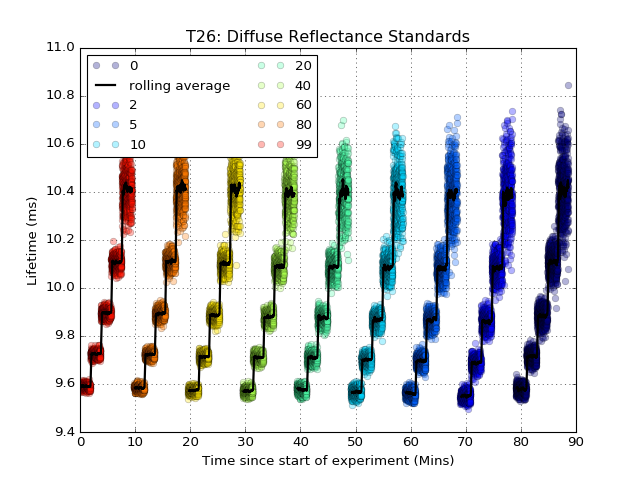

In [5]:
# Create colormap for plotting
n = len(df.concentration.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50).mean()
#     ax.plot(group['delta'], rolling, '-', lw=2, label='rolling ({k})'.format(k=key), color='black')
    ax.plot(group['delta'], rolling, '-', lw=2, label='rolling average', color='black')

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', ncol=2, fontsize='medium')
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Lifetime (ms)')
plt.title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
plt.savefig(data_folder +  str(folder) + '/lifetimeVsTime.png', dpi=500)

# Each concentration vs lifetime (Rolling Mean)

In [6]:
plt.close("all")

In [7]:
# Make directory to store files
directory = data_folder + str(folder) + '/individual/'
if not os.path.exists(directory):
    os.makedirs(directory)

<IPython.core.display.Javascript object>


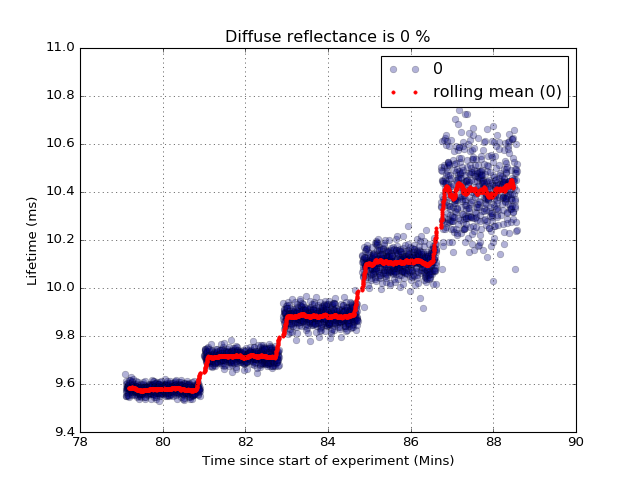

<IPython.core.display.Javascript object>


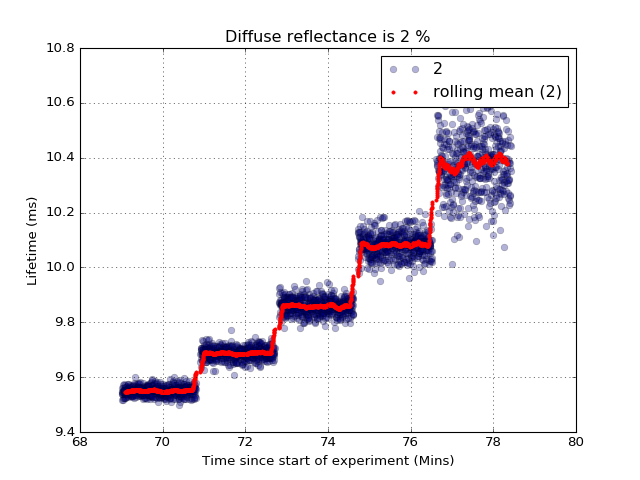

<IPython.core.display.Javascript object>


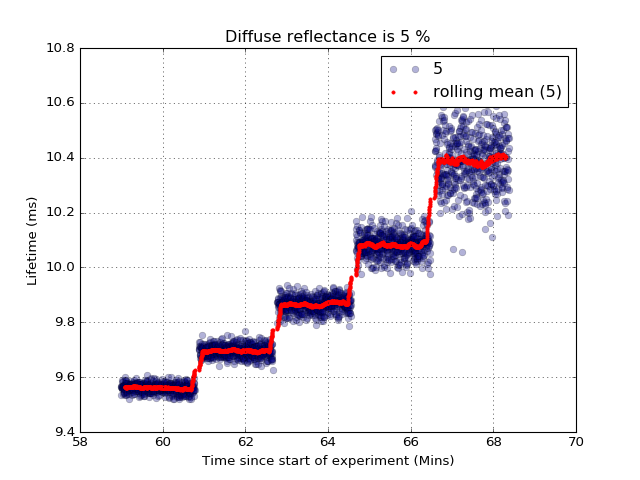

<IPython.core.display.Javascript object>


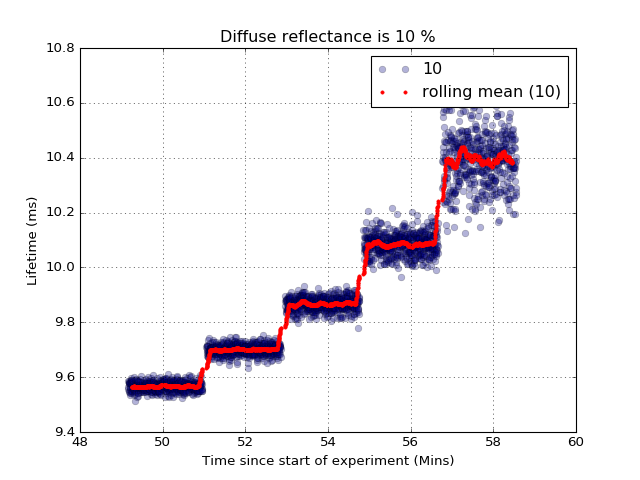

<IPython.core.display.Javascript object>


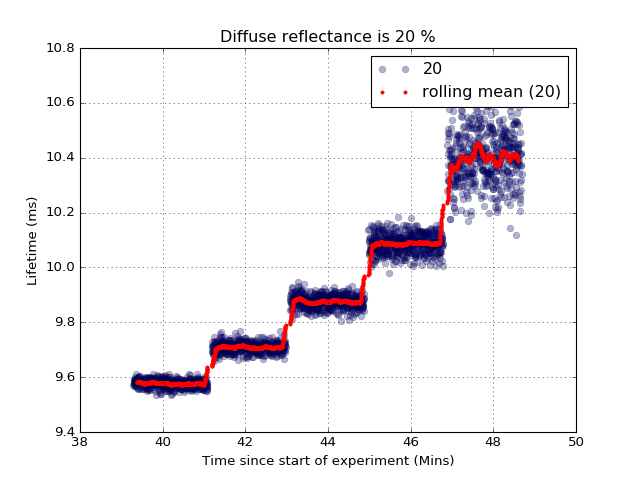

<IPython.core.display.Javascript object>


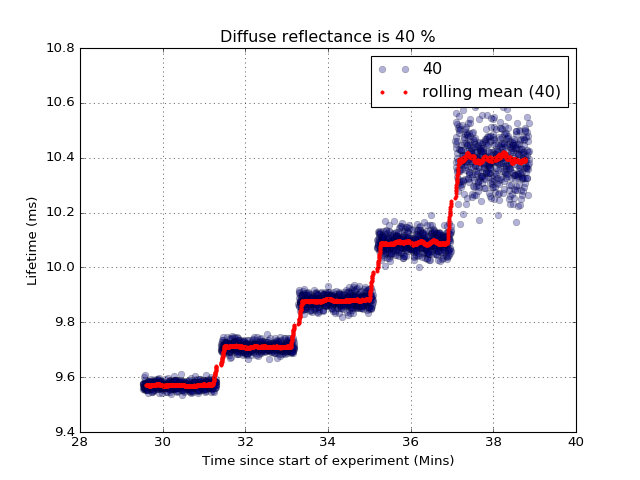

<IPython.core.display.Javascript object>


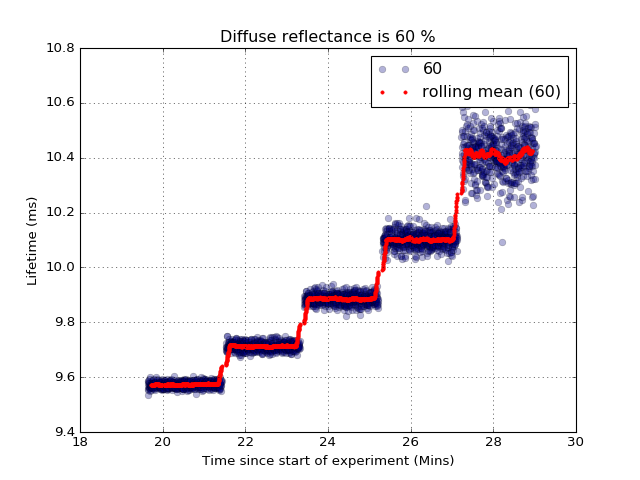

<IPython.core.display.Javascript object>


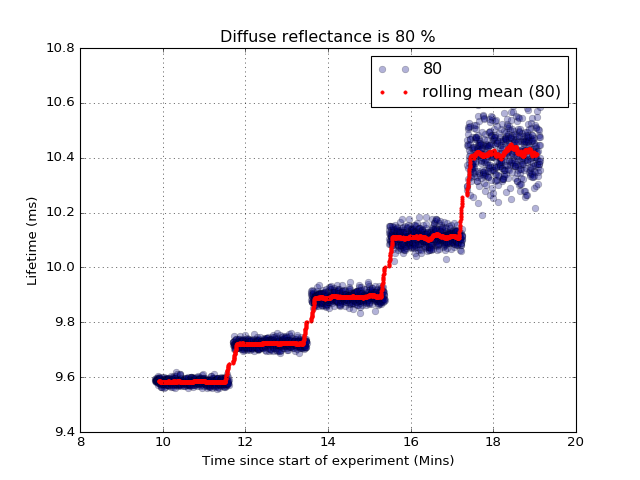

<IPython.core.display.Javascript object>


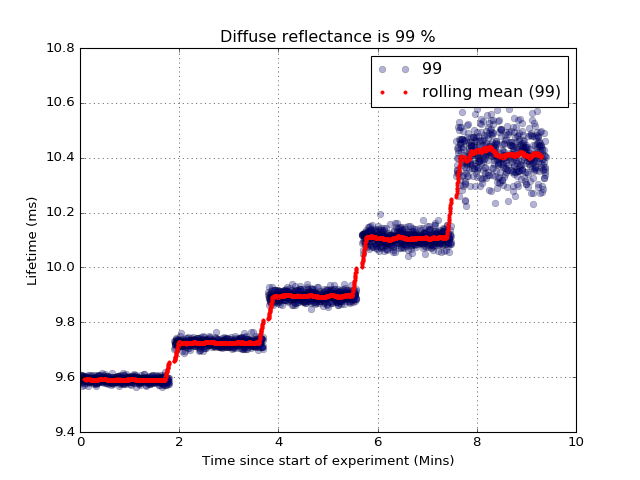

In [8]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.ticklabel_format(useOffset=False, axis='y')
    plt.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Diffuse reflectance is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Lifetime (ms)')
    plt.legend()
    plt.savefig(data_folder + str(folder) + '/individual/' + str(key) + '.png', dpi=200)

In [9]:
plt.close("all")

In [10]:
df2 = df[['concentration', 'current', 'tau', 'A']]

In [11]:
# Drop 0 reflectance (air) as this has a refractive index of 1 
# whereas all the scattering standards have a refractive index of 1.35
df2 = df2[df2['concentration'] != 0]

## tau & A vs concentration

In [12]:
# Apply mean and std functions to all collumns
g = df2.groupby(['current', 'concentration']).agg([np.mean, np.std])
g.head()

tau                   A          
                            mean       std      mean       std
current concentration                                         
0.1     2              10.385901  0.118508  0.066239  0.000478
        5              10.391847  0.104812  0.069321  0.000480
        10             10.394619  0.101096  0.072823  0.000483
        20             10.398929  0.094265  0.079073  0.000487
        40             10.397422  0.081371  0.093261  0.000500

In [13]:
g2 = g.reset_index()
g3 = g2.groupby('current')

<IPython.core.display.Javascript object>


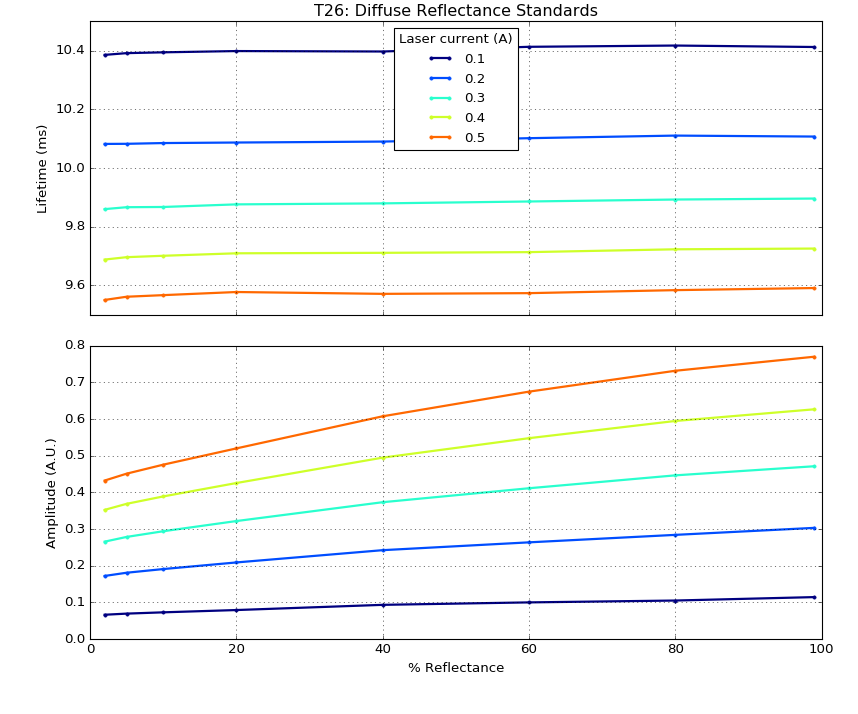

In [14]:
# Create colormap for plotting
n = len(df.current.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for key, group in g3:
    ax1.plot(group['concentration'], group['tau']['mean'], '.-', lw='2', label=key)
    ax2.plot(group['concentration'], group['A']['mean'], '.-', lw='2', label=key)

ax2.set_xlabel('% Reflectance')
ax1.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Amplitude (A.U.)')

ax1.grid()
ax2.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')
ax1.set_title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
ax1.legend(title='Laser current (A)', loc='best', fontsize='medium')
plt.savefig(data_folder +  str(folder) + '/final.png', dpi=500)

In [16]:
x = g2.concentration
y = g2.current
z = g2['tau']['mean']

<IPython.core.display.Javascript object>


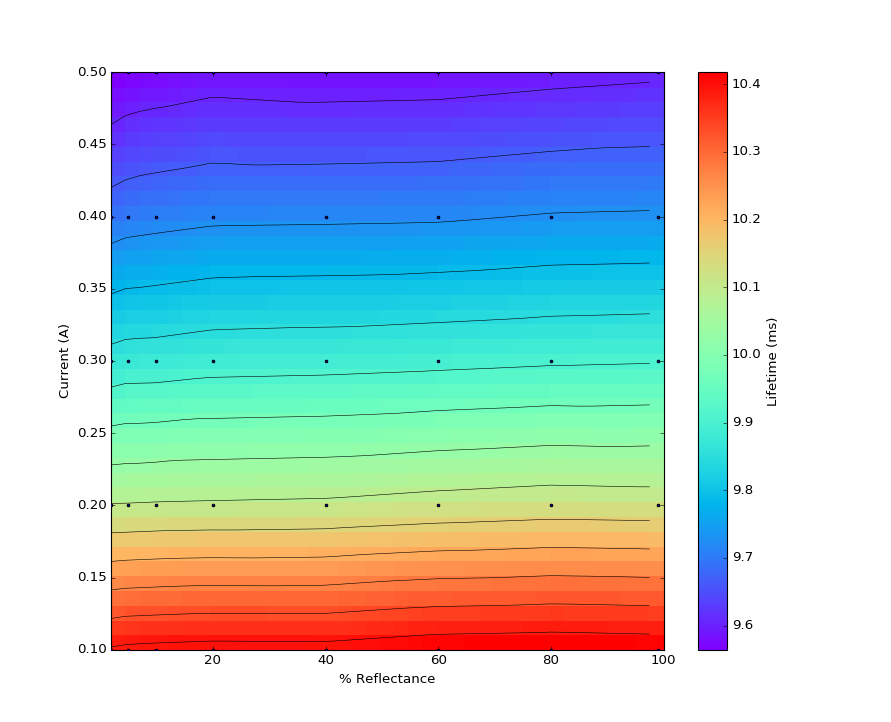

In [17]:
fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('rainbow'))
plt.colorbar(label='Lifetime (ms)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')
plt.savefig(data_folder +  str(folder) + '/contour.png', dpi=500)

<IPython.core.display.Javascript object>


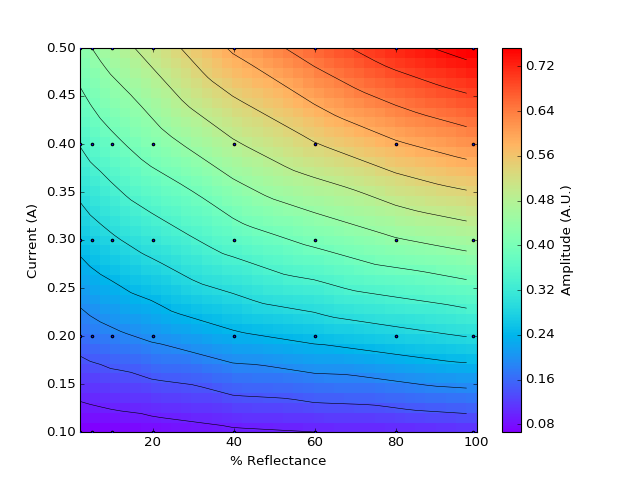

In [18]:
z = g2['A']['mean']
fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('rainbow'))
plt.colorbar(label='Amplitude (A.U.)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')
plt.savefig(data_folder +  str(folder) + '/contour_amp.png', dpi=500)